In [1]:
import numpy as np
import seaborn as sns
import baltic as bt
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import json
import pickle
from copy import deepcopy

In [2]:
colors = pickle.load(open('../../figures/colors.p', 'rb'))

In [3]:
titer_file = '../../data/titers_katzelnick2015/dengue_titers.tsv'
titers = pd.read_csv(titer_file, sep='\t')
titers = titers.loc[titers['source'].isin(['monovalent', 'agm_3mo'])]
print titers.head()

                 virus_strain                            serum_strain  \
0  DENV1/BOLIVIA/FSB3363/2010  DENV1/NAURU/WESTERNPACIFICDELTA30/1974   
1  DENV1/BOLIVIA/FSB3363/2010  DENV1/NAURU/WESTERNPACIFICDELTA30/1974   
2  DENV1/BOLIVIA/FSB3363/2010  DENV1/NAURU/WESTERNPACIFICDELTA30/1974   
3  DENV1/BOLIVIA/FSB3363/2010  DENV1/NAURU/WESTERNPACIFICDELTA30/1974   
4  DENV1/BOLIVIA/FSB3363/2010  DENV1/NAURU/WESTERNPACIFICDELTA30/1974   

   serum_id      source  titer  
0         3  monovalent     20  
1        13  monovalent     17  
2        15  monovalent     12  
3        19  monovalent     10  
4        38  monovalent     13  


In [14]:
def subsample_titers(n_per_serotype, titers=titers, out_file=None):
    
    serotypes = ['DENV1', 'DENV2', 'DENV3', 'DENV4']

    selected_sera = []
    for serotype in serotypes:
        
        serotype_titers = titers.loc[titers['serum_strain'].str.startswith(serotype)]
        serotype_sera = set(serotype_titers['serum_strain'].values)
        try:
            the_chosen_ones = np.random.choice(list(serotype_sera), size=n_per_serotype, replace=False).tolist()
        except ValueError: # n > len(serotype_sera)
            the_chosen_ones = list(serotype_sera)
        selected_sera += the_chosen_ones
        
    selected_titers = titers.loc[titers['serum_strain'].isin(selected_sera)]
    
    if out_file:
        selected_titers.to_csv(out_file, index=False, sep='\t')
    return selected_titers

In [15]:
for n in [1,3,5]:
    ofile = './rarefaction_titers_n%d.tsv'%n
    subsample_titers(n,out_file=ofile)

In [19]:
for n in [1,3,5]:
    prepare_cmd = 'python dengue.prepare.py -s all --titers ../../rarefaction/rarefaction_titers_n%d.tsv --strains ../../../data/sequences/titered_strains.txt --file_prefix rarefaction_n%d --sequences ../../../data/sequences/titered_E.fasta'%(n,n)
    print prepare_cmd
    print '\n\n'

python dengue.prepare.py -s all --titers ../../rarefaction/rarefaction_titers_n1.tsv --strains ../../../data/sequences/titered_strains.txt --file_prefix rarefaction_n1 --sequences ../../../data/sequences/titered_E.fasta



python dengue.prepare.py -s all --titers ../../rarefaction/rarefaction_titers_n3.tsv --strains ../../../data/sequences/titered_strains.txt --file_prefix rarefaction_n3 --sequences ../../../data/sequences/titered_E.fasta



python dengue.prepare.py -s all --titers ../../rarefaction/rarefaction_titers_n5.tsv --strains ../../../data/sequences/titered_strains.txt --file_prefix rarefaction_n5 --sequences ../../../data/sequences/titered_E.fasta





In [22]:
for n in [1,3,5]:
    prepared_json = json.load(open('../implementation-nextstrain-augur/dengue/prepared/rarefaction_n%d.json'%n))
    
    reference_block = {
    "included": False, 
    "strain": "DENV4/NA/REFERENCE/2003", 
        "genes": {
        "E": {
            "start": 0, 
            "end": 1485, 
            "strand": 1
            }
        }, 
    "seq": "ATGCGATGCGTAGGAGTAGGAAACAGAGACTTTGTGGAAGGAGTCTCAGGTGGAGCATGGGTCGACCTGGTGCTAGAACATGGAGGATGCGTCACAACCATGGCCCAGGGAAAACCAACCTTGGATTTTGAACTGACTAAGACAACAGCCAAGGAAGTGGCTCTGTTAAGAACCTATTGCATTGAAGCCTCAATATCAAACATAACTACGGCAACAAGATGTCCAACGCAAGGAGAGCCTTATCTGAAAGAGGAACAGGACCAACAGTACATTTGCCGGAGAGATGTGGTAGACAGAGGGTGGGGCAATGGCTGTGGCTTGTTTGGAAAAGGAGGAGTTGTGACATGTGCGAAGTTTTCATGTTCGGGGAAGATAACAGGCAATTTGGTCCAAATTGAGAACCTTGAATACACAGTGGTTGTAACAGTCCACAATGGAGACACCCATGCAGTAGGAAATGACACATCCAATCATGGAGTTACAGCCATGATAACTCCCAGGTCACCATCGGTGGAAGTCAAATTGCCGGACTATGGAGAACTAACACTCGATTGTGAACCCAGGTCTGGAATTGACTTTAATGAGATGATTCTGATGAAAATGAAAAAGAAAACATGGCTCGTGCATAAGCAATGGTTTTTGGATCTGCCTCTTCCATGGACAGCAGGAGCAGACACATCAGAGGTTCACTGGAATTACAAAGAGAGAATGGTGACATTTAAGGTTCCTCATGCCAAGAGACAGGATGTGACAGTGCTGGGATCTCAGGAAGGAGCCATGCATTCTGCCCTCGCTGGAGCCACAGAAGTGGACTCCGGTGATGGAAATCACATGTTTGCAGGACATCTTAAGTGCAAAGTCCGTATGGAGAAATTGAGAATCAAGGGAATGTCATACACGATGTGTTCAGGAAAGTTTTCAATTGACAAAGAGATGGCAGAAACACAGCATGGGACAACAGTGGTGAAAGTCAAGTATGAAGGTGCTGGAGCTCCGTGTAAAGTCCCCATAGAGATAAGAGATGTAAACAAGGAAAAAGTGGTTGGGCGTATCATCTCATCCACCCCTTTGGCTGAGAATACCAACAGTGTAACCAACATAGAATTAGAACCCCCCTTTGGGGACAGCTACATAGTGATAGGTGTTGGAAACAGCGCATTAACACTCCATTGGTTCAGGAAAGGGAGTTCCATTGGCAAGATGTTTGAGTCCACATACAGAGGTGCAAAACGAATGGCCATTCTAGGTGAAACAGCTTGGGATTTTGGTTCCGTTGGTGGACTGTTCACATCATTGGGAAAGGCTGTGCACCAGGTTTTTGGAAGTGTGTATACAACCATGTTTGGAGGAGTCTCATGGATGATTAGAATCCTAATTGGGTTCTTAGTGTTGTGGATTGGCACGAACTCGAGGAACACTTCAATGGCTATGACGTGCATAGCTGTTGGAGGAATCACTCTGTTTCTGGGCTTCACAGTTCAAGCA"
     }
    
    prepared_json['reference'] = reference_block
    json.dump(prepared_json, open('../implementation-nextstrain-augur/dengue/prepared/rarefaction_n%d.json'%n, 'w'), indent=1)

In [24]:
for n in [1,3,5]:
    process_cmd = 'python dengue.process.py -j ./prepared/rarefaction_n%d.json --no_tree_freqs'%n
    print process_cmd
    print '\n\n'

python dengue.process.py -j ./prepared/rarefaction_n1.json --no_tree_freqs



python dengue.process.py -j ./prepared/rarefaction_n3.json --no_tree_freqs



python dengue.process.py -j ./prepared/rarefaction_n5.json --no_tree_freqs





In [25]:
tree = bt.loadJSON('../shared_output/dengue_all_tree.json', json_translation={'height': 'div', 'name': 'strain'})


Tree height: 0.463664
Tree length: 9.978979
annotations present

Numbers of objects in tree: 4716 (2149 nodes and 2567 leaves)



In [26]:
def lookup_node(clade, tree):
    try:
        return [k for k in tree.nodes if k.traits['clade'] == clade][0]
    except:
        return None
    
def assign_tree_titer_values(titers, tree):
    from copy import deepcopy
    titer_tree = deepcopy(tree)
    for clade, dTiter in titers['dTiter'].items():
        node = lookup_node(int(clade), titer_tree)
        node.traits['dTiter'] = dTiter
        
    for clade in titer_tree.traverse_tree(include_all=True):
        if 'dTiter' not in clade.traits:
            clade.traits['dTiter'] = 0.
        
        if clade.parent is not None and clade.index != 'Root':
            clade.traits['cTiter'] = clade.parent.traits['cTiter'] + clade.traits['dTiter']
        else:
            clade.traits['cTiter']=0.
    return titer_tree

def find_n_phenotypes(path, tree):    
    titers = json.load(open(path, 'r'))
    titer_tree = assign_tree_titer_values(titers, tree)
    
    n_cTiter = len(set([round(k.traits['cTiter'],1) for k in titer_tree.leaves]))
    return n_cTiter, titer_tree
                   
n1_cTiter, n1_tree = find_n_phenotypes('../rarefaction/n1/dengue_all_tree_model.json', tree)

In [28]:
n1_tree_string = n1_tree.toString(traits=['cTiter', 'dTiter', 'clade'], nexus=True, numName=True)


In [29]:
open('./n1/n1_titer_tree.nexus', 'w').write(n1_tree_string)

In [17]:
n_phenotypes_found = [(n,find_n_phenotypes('../rarefaction/n%d/dengue_all_tree_model.json'%n)) for n in [1,2,4,8]]

In [19]:
print n_phenotypes_found

[(1, 11), (2, 12), (4, 16), (8, 17)]


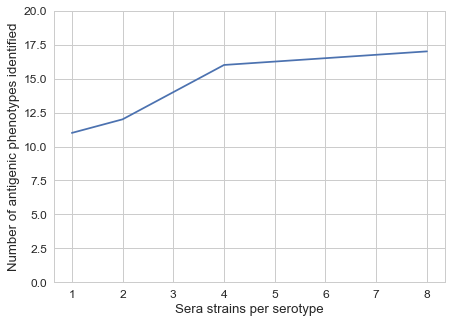

In [20]:
sns.set(style='whitegrid', font_scale=1.2)
fig, ax = plt.subplots(figsize=(7,5))
ax.plot([x[0] for x in n_phenotypes_found], [y[1] for y in n_phenotypes_found])
ax.set_ylim(0, 20)
ax.set_xlabel('Sera strains per serotype')
ax.set_ylabel('Number of antigenic phenotypes identified')